In [38]:
%pip install ucimlrepo

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [39]:
import sys
print("Python executable:", sys.executable)

Python executable: /Library/Developer/CommandLineTools/usr/bin/python3


In [57]:
from ucimlrepo import fetch_ucirepo

# Fetch dataset
dow_jones_index = fetch_ucirepo(id=312)

# Check if the dataset is fetched correctly
if dow_jones_index:
    # Data (as pandas dataframes)
    X = dow_jones_index.data.features
    y = dow_jones_index.data.targets

    # Print data to verify
    print("Features:\n", X.head())
    print("Targets:\n", y.head())

    # Metadata
    print("Metadata:\n", dow_jones_index.metadata)
else:
    print("Failed to fetch the dataset.")




Features:
    quarter stock       date    open    high     low   close     volume  \
0        1    AA   1/7/2011  $15.82  $16.72  $15.78  $16.42  239655616   
1        1    AA  1/14/2011  $16.71  $16.71  $15.64  $15.97  242963398   
2        1    AA  1/21/2011  $16.19  $16.38  $15.60  $15.79  138428495   
3        1    AA  1/28/2011  $15.87  $16.63  $15.82  $16.13  151379173   
4        1    AA   2/4/2011  $16.18  $17.39  $16.18  $17.14  154387761   

   percent_change_price  percent_change_volume_over_last_wk  \
0               3.79267                                 NaN   
1              -4.42849                            1.380223   
2              -2.47066                          -43.024959   
3               1.63831                            9.355500   
4               5.93325                            1.987452   

   previous_weeks_volume next_weeks_open next_weeks_close  \
0                    NaN          $16.71           $15.97   
1            239655616.0          $16.19   

In [58]:
import pandas as pd

# Check for missing values in features
print("Missing values in features:\n", X.isnull().sum())

# Handle missing values by filling with forward fill (or another method)
X.fillna(method='ffill', inplace=True)

# Ensure 'Date' is in datetime format if 'Date' column exists
if 'Date' in X.columns:
    X['Date'] = pd.to_datetime(X['Date'])

# Verify the changes
print("Features after handling missing values:\n", X.head())

Missing values in features:
 quarter                                0
stock                                  0
date                                   0
open                                   0
high                                   0
low                                    0
close                                  0
volume                                 0
percent_change_price                   0
percent_change_volume_over_last_wk    30
previous_weeks_volume                 30
next_weeks_open                        0
next_weeks_close                       0
days_to_next_dividend                  0
percent_return_next_dividend           0
dtype: int64
Features after handling missing values:
    quarter stock       date    open    high     low   close     volume  \
0        1    AA   1/7/2011  $15.82  $16.72  $15.78  $16.42  239655616   
1        1    AA  1/14/2011  $16.71  $16.71  $15.64  $15.97  242963398   
2        1    AA  1/21/2011  $16.19  $16.38  $15.60  $15.79  138428495   
3     

/var/folders/67/mqk_v6kn5bd4zrf0q0fnc3p00000gn/T/ipykernel_3532/752600223.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X.fillna(method='ffill', inplace=True)
/var/folders/67/mqk_v6kn5bd4zrf0q0fnc3p00000gn/T/ipykernel_3532/752600223.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(method='ffill', inplace=True)


In [59]:
print("Features:\n", X.head())


Features:
    quarter stock       date    open    high     low   close     volume  \
0        1    AA   1/7/2011  $15.82  $16.72  $15.78  $16.42  239655616   
1        1    AA  1/14/2011  $16.71  $16.71  $15.64  $15.97  242963398   
2        1    AA  1/21/2011  $16.19  $16.38  $15.60  $15.79  138428495   
3        1    AA  1/28/2011  $15.87  $16.63  $15.82  $16.13  151379173   
4        1    AA   2/4/2011  $16.18  $17.39  $16.18  $17.14  154387761   

   percent_change_price  percent_change_volume_over_last_wk  \
0               3.79267                                 NaN   
1              -4.42849                            1.380223   
2              -2.47066                          -43.024959   
3               1.63831                            9.355500   
4               5.93325                            1.987452   

   previous_weeks_volume next_weeks_open next_weeks_close  \
0                    NaN          $16.71           $15.97   
1            239655616.0          $16.19   

In [60]:
print("Targets:\n", y.head())

Targets:
    percent_change_next_weeks_price
0                        -4.428490
1                        -2.470660
2                         1.638310
3                         5.933250
4                         0.230814


In [46]:
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


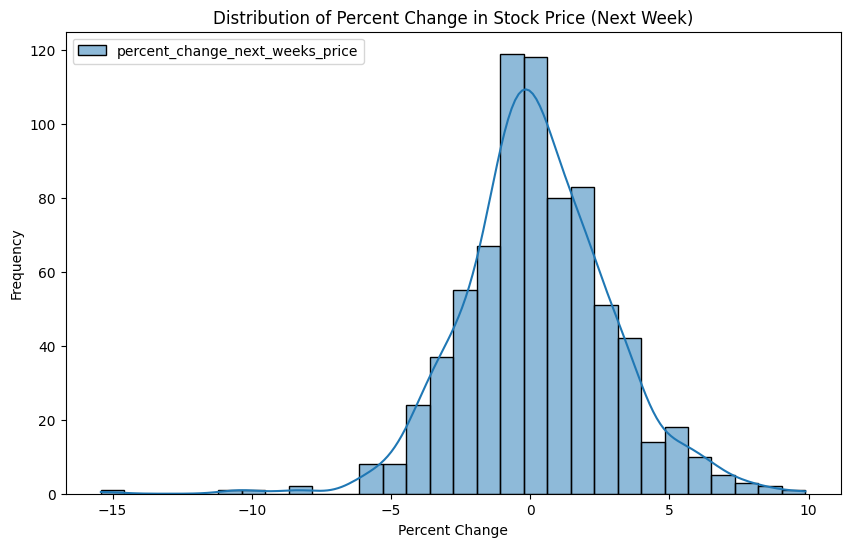

In [61]:
import matplotlib.pyplot as plt

# Plot distribution of target variable (percent change next week's price)
plt.figure(figsize=(10, 6))
sns.histplot(y, kde=True, color='blue', bins=30)
plt.title('Distribution of Percent Change in Stock Price (Next Week)')
plt.xlabel('Percent Change')
plt.ylabel('Frequency')
plt.show()


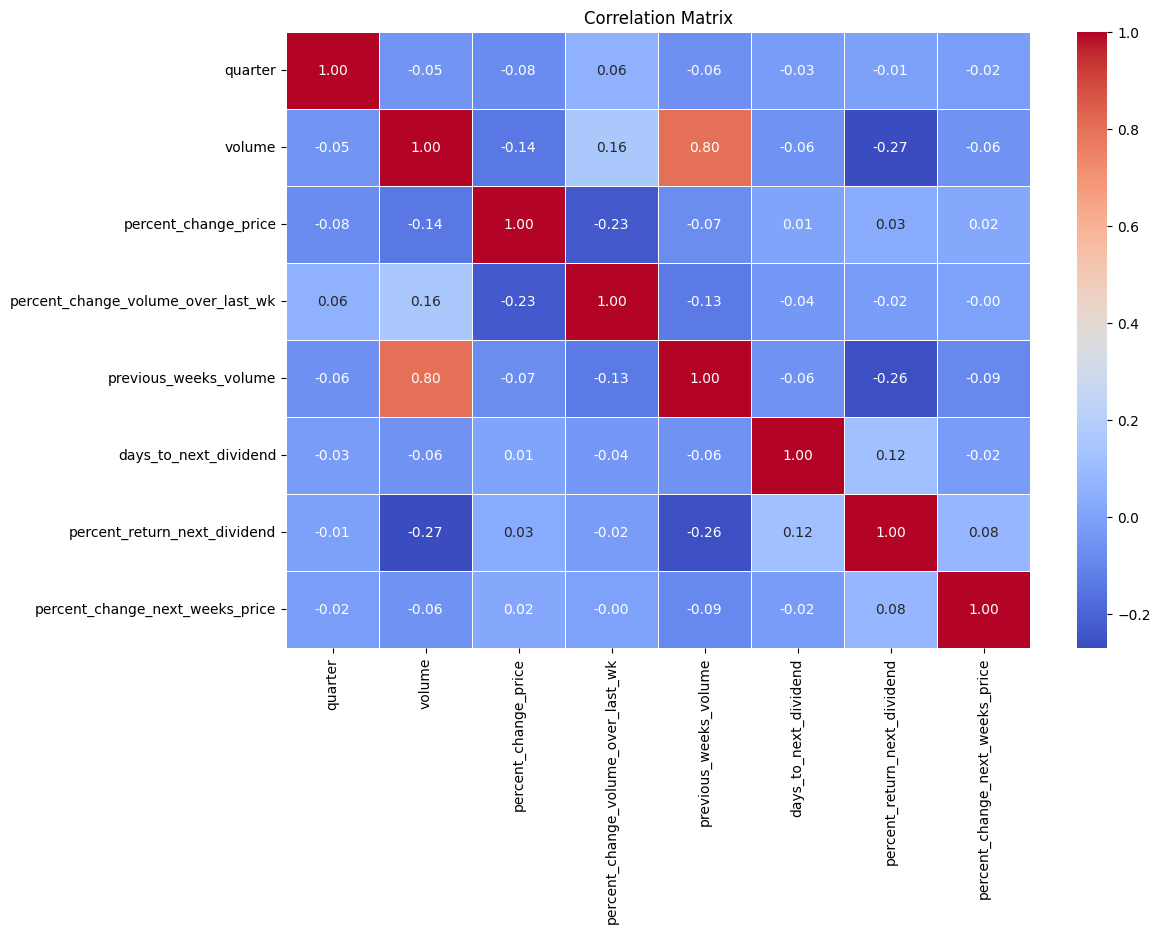

In [62]:
# Combine X and y to calculate correlations
df = X.copy()
df['percent_change_next_weeks_price'] = y

# Select only numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
corr_matrix = numeric_df.corr()

# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


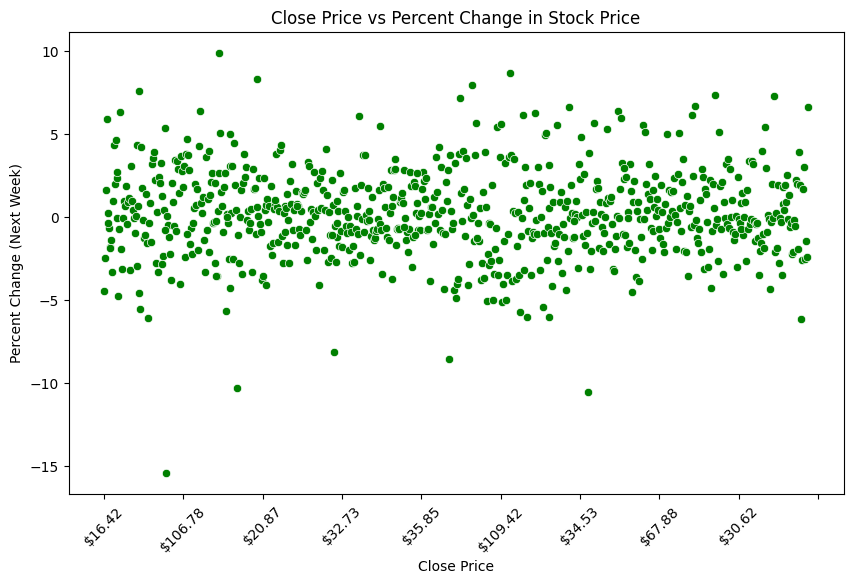

In [35]:
# Scatter plot between Close price and target variable (percent change)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['close'], y=df['percent_change_next_weeks_price'], color='green')
plt.title('Close Price vs Percent Change in Stock Price')
plt.xlabel('Close Price')
plt.ylabel('Percent Change (Next Week)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Reduce the number of x-axis labels
ax = plt.gca()
ax.xaxis.set_major_locator(plt.MaxNLocator(10))  # Show up to 10 x-axis labels

plt.show()


In [63]:
# Ensure 'date' is in datetime format if 'date' column exists
if 'date' in X.columns:
    X['date'] = pd.to_datetime(X['date'])
    X.set_index('date', inplace=True)


/var/folders/67/mqk_v6kn5bd4zrf0q0fnc3p00000gn/T/ipykernel_3532/739295265.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['date'] = pd.to_datetime(X['date'])


In [84]:
# Check the target variable y
print("Target variable y:\n", y.head())
print("Target variable columns:\n", y.columns)

Target variable y:
    percent_change_next_weeks_price
0                        -4.428490
1                        -2.470660
2                         1.638310
3                         5.933250
4                         0.230814
Target variable columns:
 Index(['percent_change_next_weeks_price'], dtype='object')


In [86]:
# Check the indices of X and y
print("Indices of X:\n", X.index)
print("Indices of y:\n", y.index)

Indices of X:
 DatetimeIndex(['2011-01-07', '2011-01-14', '2011-01-21', '2011-01-28',
               '2011-02-04', '2011-02-11', '2011-02-18', '2011-02-25',
               '2011-03-04', '2011-03-11',
               ...
               '2011-04-21', '2011-04-29', '2011-05-06', '2011-05-13',
               '2011-05-20', '2011-05-27', '2011-06-03', '2011-06-10',
               '2011-06-17', '2011-06-24'],
              dtype='datetime64[ns]', name='date', length=750, freq=None)
Indices of y:
 RangeIndex(start=0, stop=750, step=1)


Missing values before resampling:
 quarter                               0
stock                                 0
open                                  0
high                                  0
low                                   0
close                                 0
volume                                0
percent_change_price                  0
percent_change_volume_over_last_wk    1
previous_weeks_volume                 1
next_weeks_open                       0
next_weeks_close                      0
days_to_next_dividend                 0
percent_return_next_dividend          0
percent_change_next_weeks_price       0
dtype: int64


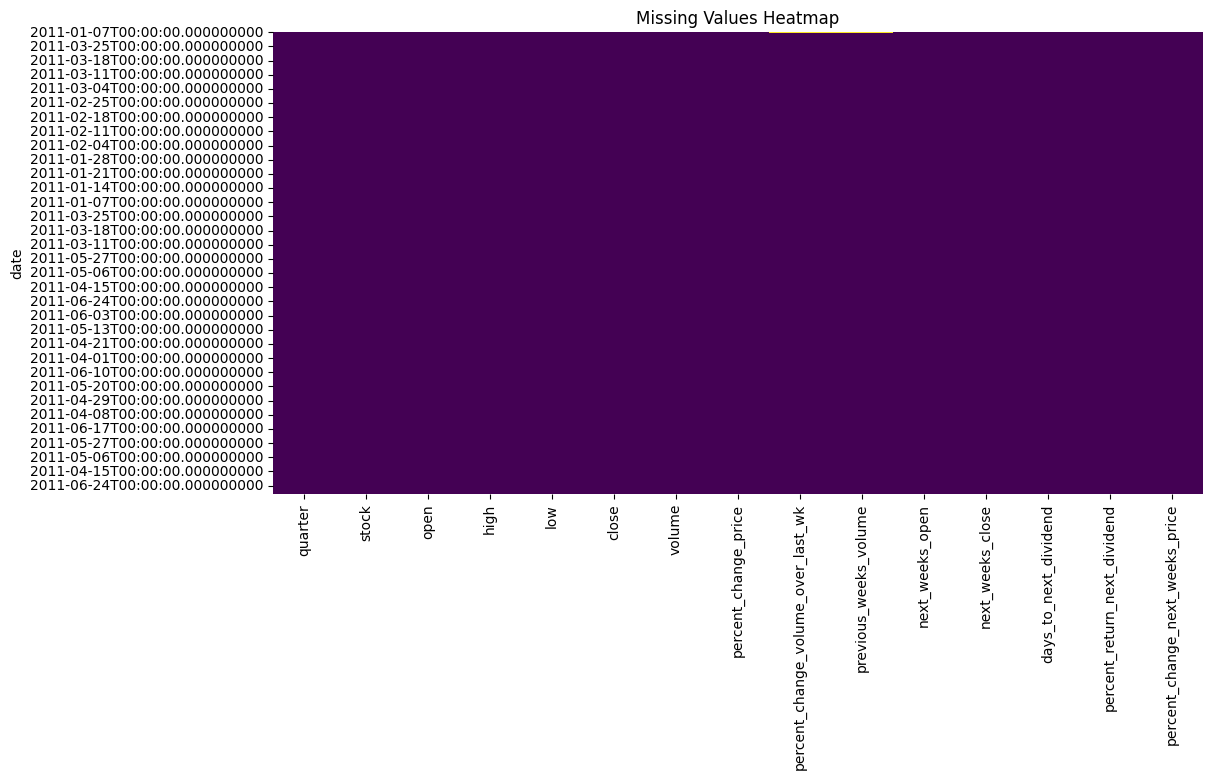

In [93]:
import numpy as np

# Align the indices of y to match X
y.index = X.index

# Combine X and y to include 'percent_change_next_weeks_price' in the DataFrame
df = X.copy()
df['percent_change_next_weeks_price'] = y['percent_change_next_weeks_price']

# Check for missing values
print("Missing values before resampling:\n", df.isnull().sum())

# Visualize missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()



In [94]:
# Forward-fill missing values
df.fillna(method='ffill', inplace=True)

# Backward-fill missing values
df.fillna(method='bfill', inplace=True)

# Check for missing values after forward-fill and backward-fill
print("Missing values after forward-fill and backward-fill:\n", df.isnull().sum())


Missing values after forward-fill and backward-fill:
 quarter                               0
stock                                 0
open                                  0
high                                  0
low                                   0
close                                 0
volume                                0
percent_change_price                  0
percent_change_volume_over_last_wk    0
previous_weeks_volume                 0
next_weeks_open                       0
next_weeks_close                      0
days_to_next_dividend                 0
percent_return_next_dividend          0
percent_change_next_weeks_price       0
dtype: int64


/var/folders/67/mqk_v6kn5bd4zrf0q0fnc3p00000gn/T/ipykernel_3532/2452482658.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
/var/folders/67/mqk_v6kn5bd4zrf0q0fnc3p00000gn/T/ipykernel_3532/2452482658.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


In [95]:
# Drop rows with remaining missing values
df.dropna(inplace=True)

# Check for missing values after dropping rows
print("Missing values after dropping rows:\n", df.isnull().sum())


Missing values after dropping rows:
 quarter                               0
stock                                 0
open                                  0
high                                  0
low                                   0
close                                 0
volume                                0
percent_change_price                  0
percent_change_volume_over_last_wk    0
previous_weeks_volume                 0
next_weeks_open                       0
next_weeks_close                      0
days_to_next_dividend                 0
percent_return_next_dividend          0
percent_change_next_weeks_price       0
dtype: int64


Missing values before resampling:
 quarter                               0
stock                                 0
open                                  0
high                                  0
low                                   0
close                                 0
volume                                0
percent_change_price                  0
percent_change_volume_over_last_wk    1
previous_weeks_volume                 1
next_weeks_open                       0
next_weeks_close                      0
days_to_next_dividend                 0
percent_return_next_dividend          0
percent_change_next_weeks_price       0
dtype: int64


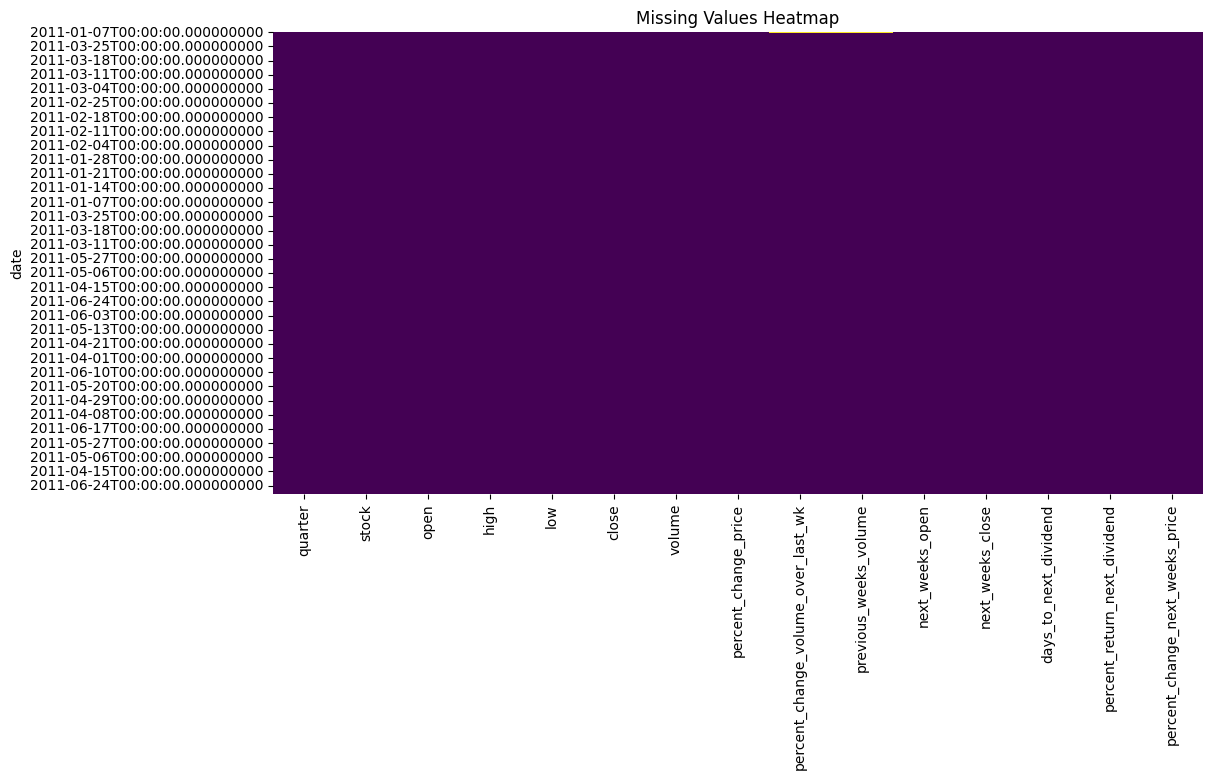

In [96]:
import seaborn as sns

# Ensure 'percent_change_next_weeks_price' exists in X
if 'percent_change_next_weeks_price' not in X.columns:
	X['percent_change_next_weeks_price'] = y['percent_change_next_weeks_price']

# Combine X and y to include 'percent_change_next_weeks_price' in the DataFrame
df = X.copy()
df['percent_change_next_weeks_price'] = y['percent_change_next_weeks_price']

# Check for missing values
print("Missing values before resampling:\n", df.isnull().sum())

# Visualize missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [100]:
# Select only numeric columns for resampling
numeric_columns = ['percent_change_price', 'volume', 'percent_change_next_weeks_price']
weekly_data = df[numeric_columns].resample('W').mean()  # Resample to weekly average

# Apply log transformation to volume
weekly_data['log_volume'] = weekly_data['volume'].apply(lambda x: np.log(x + 1))  # Add 1 to avoid log(0)



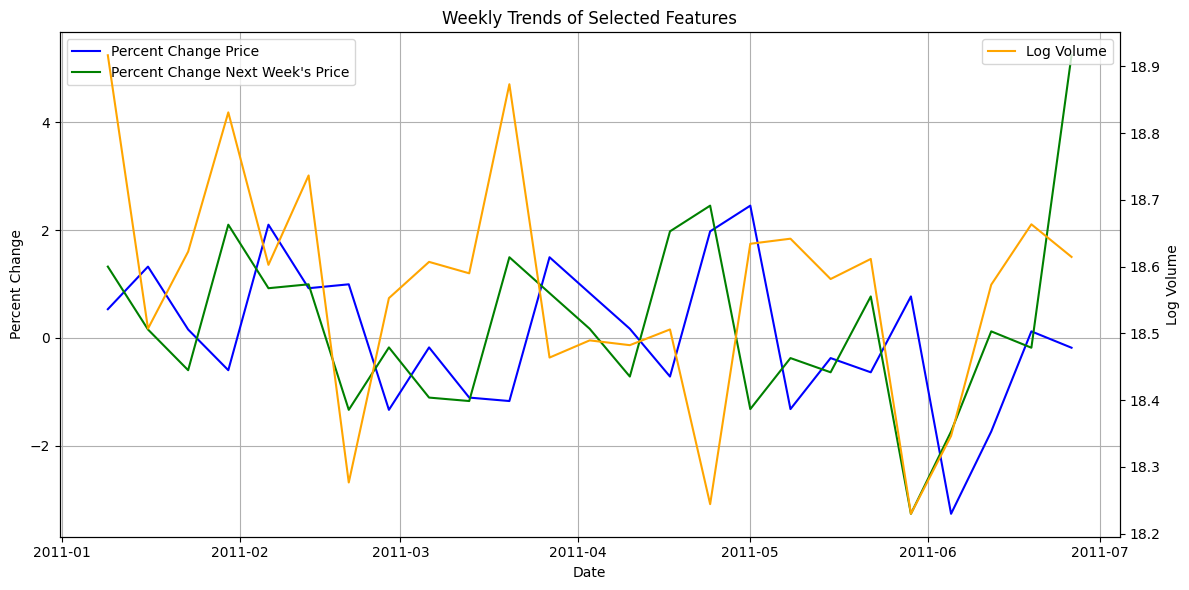

In [101]:
# Plot the resampled data with separate y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(weekly_data.index, weekly_data['percent_change_price'], label='Percent Change Price', color='blue')
ax1.plot(weekly_data.index, weekly_data['percent_change_next_weeks_price'], label='Percent Change Next Week\'s Price', color='green')
ax1.set_xlabel('Date')
ax1.set_ylabel('Percent Change')
ax1.legend(loc='upper left')
ax1.grid(True)

# Create a secondary y-axis for volume
ax2 = ax1.twinx()
ax2.plot(weekly_data.index, weekly_data['log_volume'], label='Log Volume', color='orange')
ax2.set_ylabel('Log Volume')
ax2.legend(loc='upper right')

plt.title("Weekly Trends of Selected Features")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [69]:
print(weekly_data[['percent_change_price', 'percent_change_next_weeks_price']].describe())


       percent_change_price  percent_change_next_weeks_price
count             25.000000                              0.0
mean               0.050262                              NaN
std                1.337036                              NaN
min               -3.257622                              NaN
25%               -0.714650                              NaN
50%                0.122466                              NaN
75%                0.922095                              NaN
max                2.451867                              NaN


In [70]:
print(weekly_data['percent_change_next_weeks_price'])


date
2011-01-09   NaN
2011-01-16   NaN
2011-01-23   NaN
2011-01-30   NaN
2011-02-06   NaN
2011-02-13   NaN
2011-02-20   NaN
2011-02-27   NaN
2011-03-06   NaN
2011-03-13   NaN
2011-03-20   NaN
2011-03-27   NaN
2011-04-03   NaN
2011-04-10   NaN
2011-04-17   NaN
2011-04-24   NaN
2011-05-01   NaN
2011-05-08   NaN
2011-05-15   NaN
2011-05-22   NaN
2011-05-29   NaN
2011-06-05   NaN
2011-06-12   NaN
2011-06-19   NaN
2011-06-26   NaN
Freq: W-SUN, Name: percent_change_next_weeks_price, dtype: float64


In [66]:
# ...existing code...
print(X.columns)

# Check if the column exists before attempting to use it
required_columns = ['percent_change_price', 'volume', 'percent_change_next_weeks_price']
missing_columns = [col for col in required_columns if col not in X.columns]

if missing_columns:
    print(f"Missing columns: {missing_columns}")
else:
    normalized_data = scaler.fit_transform(X[required_columns])
# ...existing code...

Index(['quarter', 'stock', 'open', 'high', 'low', 'close', 'volume',
       'percent_change_price', 'percent_change_volume_over_last_wk',
       'previous_weeks_volume', 'next_weeks_open', 'next_weeks_close',
       'days_to_next_dividend', 'percent_return_next_dividend'],
      dtype='object')
Missing columns: ['percent_change_next_weeks_price']


/var/folders/67/mqk_v6kn5bd4zrf0q0fnc3p00000gn/T/ipykernel_3532/2445120446.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['percent_change_next_weeks_price'] = y['percent_change_next_weeks_price']
/Users/yundi/Library/Python/3.9/lib/python/site-packages/sklearn/preprocessing/_data.py:480: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/Users/yundi/Library/Python/3.9/lib/python/site-packages/sklearn/preprocessing/_data.py:481: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


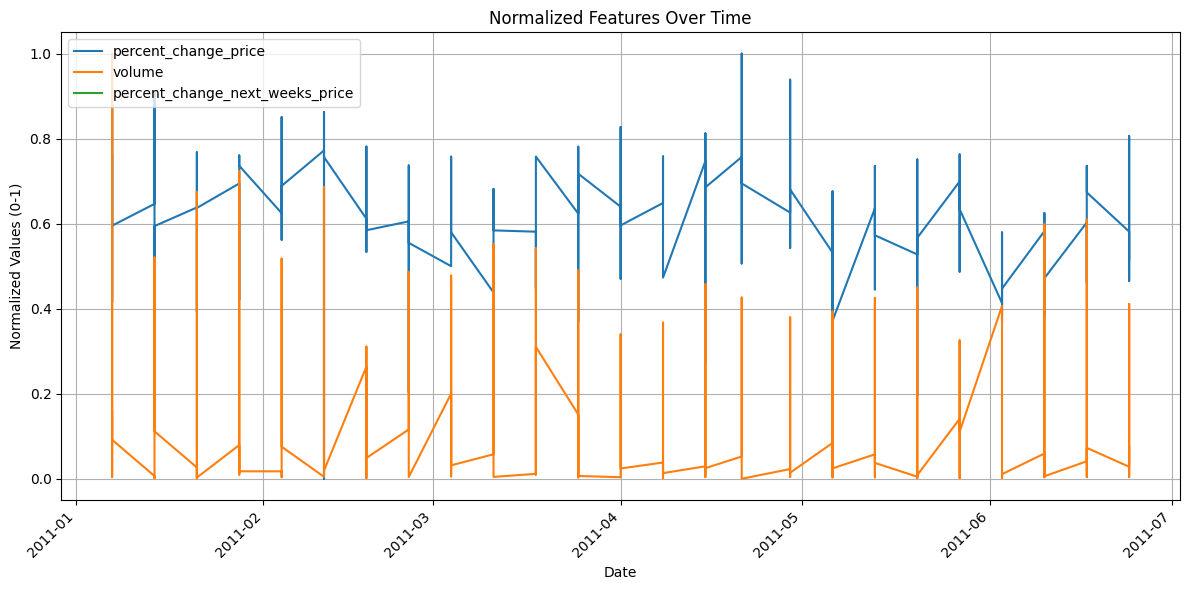

Bad pipe message: %s [b'ragma: no']
Bad pipe message: %s [b'ache\r\nProxy-Connection: keep-alive\r\nAccept: ', b'*\r\nUser-Agent: V2rayU/4.2.5 CFNetwork/149', b'0.7 Darwin/23.5.0\r\nAccept-Language: en-US,en;q=0.9\r\nA']


In [55]:
from sklearn.preprocessing import MinMaxScaler

# Ensure 'percent_change_next_weeks_price' exists in X
if 'percent_change_next_weeks_price' not in X.columns:
	X['percent_change_next_weeks_price'] = y['percent_change_next_weeks_price']

# Normalize data for better visualization
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(X[['percent_change_price', 'volume', 'percent_change_next_weeks_price']])
normalized_df = pd.DataFrame(normalized_data, columns=['percent_change_price', 'volume', 'percent_change_next_weeks_price'], index=X.index)

# Plot normalized data
normalized_df.plot(figsize=(12, 6))

plt.title("Normalized Features Over Time")
plt.xlabel("Date")
plt.ylabel("Normalized Values (0-1)")
plt.xticks(rotation=45)
plt.legend(loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()

